<a href="https://colab.research.google.com/github/Samuel-Njoroge/Youtube_Songs_Classification_with_Naive_Bayes/blob/main/Machine_Learning_with_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAIVE BAYES CLASSIFICATION ALGORITHM.**

In [ ]:
#Mounting the drive.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing libraries.

import numpy as np
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Importing different metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [ ]:
#Loading the dataset as individual files.
file_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Naive_Bayes_ML/youtube-dataset/Youtube01.csv')
file_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Naive_Bayes_ML/youtube-dataset/Youtube02.csv')
file_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Naive_Bayes_ML/youtube-dataset/Youtube03.csv')
file_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Naive_Bayes_ML/youtube-dataset/Youtube04.csv')
file_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Naive_Bayes_ML/youtube-dataset/Youtube05.csv')

In [ ]:
#Displaying the first file.
file_1.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1


The features COMMENT_ID ,AUTHOR and DATE are unnecessary so we drop them.

In [ ]:
#Joining the files to form one data frame.

data =[file_1, file_2,file_3,file_4,file_5]
youtube = pd.concat(data,axis=0, ignore_index=True)

#The features COMMENT_ID , AUTHOR ,DATE 
youtube_data = youtube.drop(['COMMENT_ID','AUTHOR','DATE'] ,axis=True)

In [ ]:
#Cheking for empty values.
youtube_data.isnull().sum()

#No missing values

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
#Total values
youtube_data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

**Naive Bayes classifier needs the dataset to be balanced. Classes shoud be almost equal or equal.**

**COUNT VECTORIZER.**

**Sample 1**

In [ ]:
message_sample = ['This is a dog']
vectorizer_sample = CountVectorizer()
vectorizer_sample.fit(message_sample)
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]])

1,1,1
means the word dog has appeared 1 time.
is - 1 time.
dog - 1 time.

In [ ]:
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [ ]:
vectorizer_sample.transform(['This is a cat']).toarray()

array([[0, 1, 1]])

cat is not part of 'This is a dog' thus [0,]

Sample 2

In [ ]:
message_sample2 = ['This is a dog and that is a dog' , 'This is a cat']

vectorizer_sample2 = CountVectorizer()
vectorizer_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]])

In [ ]:
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [ ]:
vectorizer_sample2.transform(['Those are birds']).toarray()

array([[0, 0, 0, 0, 0, 0]])

**Defining the inputs and the target.**

In [ ]:
inputs = youtube_data['CONTENT']
target = youtube_data['CLASS']

In [ ]:
# 0.2 means 20% of the dataset will be used for testing and random_state for selecting at random 
x_train ,x_test , y_train , y_test = train_test_split(inputs,target,test_size = 0.2 ,random_state =365 ,stratify = target)

In [ ]:
#checking the size 
y_train.value_counts(normalize=True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

**Tokenizing the Youtube Comments.**

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [ ]:
x_train_transf.toarray()
#sparse matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Performing the Classification.**

In [ ]:
clf = MultinomialNB(class_prior= np.array([0.6,0.4]))

In [ ]:
clf.fit(x_train_transf , y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [ ]:
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.6, 0.4]), 'fit_prior': True}

**class_prior is used to set specific values for prior probabilities.**

In [ ]:
np.exp(clf.class_log_prior_)

array([0.6, 0.4])

**Performing the evaluation on test dataset**

In [ ]:
y_test_pred = clf.predict(x_test_transf)

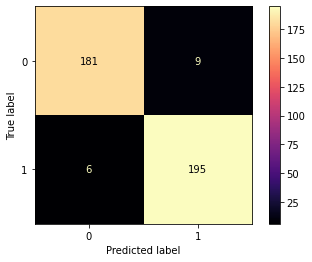

In [ ]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test , y_test_pred,
    labels = clf.classes_,
    cmap = 'magma')

**Metrics.**

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)


In [ ]:
print(classification_report(y_test , y_test_pred , target_names = ['Ham' , 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96       190
        Spam       0.96      0.97      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



**Creating probability-distribution figures.**

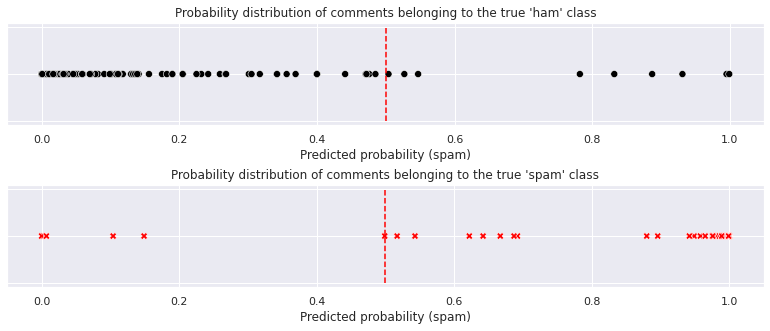

In [ ]:
# For each ovservation, store its probability of being a spam. Round it to 3 digits after the decimal points.
# These probabilities will later serve as the x-coordinates of a scatter plot
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

# Create a new data frame which will store the true classes, the predicted classes and the predicted probability
# for an observation to belong to the spam class
df_scatter = pd.DataFrame()

# Create the columns of the data frame
df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

# Reset the index of the data frame, so that the indexing is sequential
df_scatter = df_scatter.reset_index(drop = True)

# Define two palettes for the different plots
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

# Create two new data frames. The first one stores the samples whose true class is 0.
# The second one stores the samples whose true class is 1.
df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

# Set the seaborn style
sns.set()

# Create two subfigures, so that they are arranged in 2 rows and 1 column.
# Set the size of the figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
fig.tight_layout(pad = 3)

# Create a scatter plot.
# On the x-axis, we have the predicted probability of a comment being a spam.
# The y-axis takes only one value - zero. We create an array full of zeros having a length equal to 
# the number of samples whose true class is 0.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored. In this case,
# this feature has only a single class - the 0 class.
# The 's' parameter specifies the size of the points.
# The 'markers' parameter determines the shape of the points.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'style' parameter connects markers to classes.
# We have decided to set the 'legend' parameter equal to False as we have only one class in the plot. 
# We decide to remove the ticks from the y-axis as they can be chosen arbitrarily.
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

# Set a title above the first plot.
ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')

# Create a red vertical dashed line passing through the point x = 0.5
# The first parameter specifies the x-coordinate.
# The second and third parameters specify the min and the max y-coordinates.
# We choose a dashed linestyle.
# We color the line in red.
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

# The comments above apply to this plot. The code is adapted to the spam class
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

# Set a title above the second plot.
ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

# Create a red vertical dahsed line for the second plot
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red')

**Making Predictions.**

In [ ]:
predict_data = vectorizer.transform(['This is amazing!',
                                     'You can win in dollars right now, just click here!!!'])

In [ ]:
clf.predict(predict_data)

array([0, 1])